In [19]:
# k-Nearest Neighbors with Decision Tree Feature Selection Implementation

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\dt_fs_train_data_2.csv")

In [22]:
damage_labels = [1, 2, 3]

In [23]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [24]:
print(min_count)

25124


In [25]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [26]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_timber,count_families,damage_grade
30016,13,1053,1555,1,5,5,4,t,r,n,f,j,s,1,1,0,0,0,1,1
220712,13,1141,3138,2,15,6,5,t,r,q,f,x,s,0,1,0,0,0,1,1
75720,26,896,428,2,20,4,6,t,w,n,f,x,s,0,1,0,0,1,1,1
145542,27,1394,44,3,15,20,9,t,r,x,v,s,t,0,0,0,0,0,1,1
86355,20,214,10977,1,0,4,2,t,r,n,f,j,t,0,1,0,0,1,1,1


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])

In [29]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_timber,count_families,damage_grade
30016,13,1053,1555,1,5,5,4,2,2,0,0,0,2,1,1,0,0,0,1,1
220712,13,1141,3138,2,15,6,5,2,2,1,0,3,2,0,1,0,0,0,1,1
75720,26,896,428,2,20,4,6,2,4,0,0,3,2,0,1,0,0,1,1,1
145542,27,1394,44,3,15,20,9,2,2,2,2,2,3,0,0,0,0,0,1,1
86355,20,214,10977,1,0,4,2,2,2,0,0,0,3,0,1,0,0,1,1,1


In [30]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,19].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=275)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=275)

In [33]:
y_pred = classifier.predict(X_test)


C:\Users\Brad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.46      0.51      0.48      5096
           2       0.38      0.32      0.34      4999
           3       0.41      0.43      0.42      4980

    accuracy                           0.42     15075
   macro avg       0.41      0.42      0.41     15075
weighted avg       0.41      0.42      0.42     15075



In [35]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']

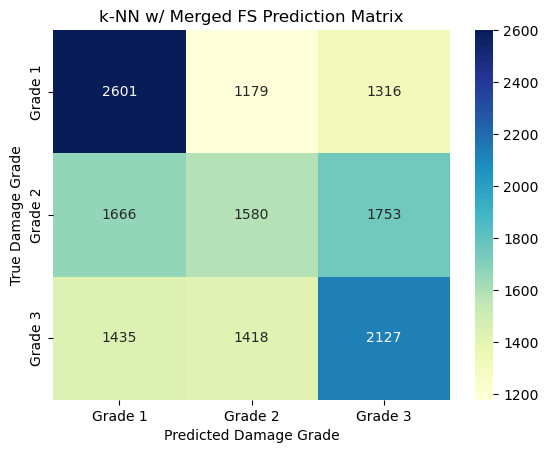

In [36]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("k-NN w/ Merged FS Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()